In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!




1: Websites
2: Text

Enter your Choice: 1
Enter URL of websites seprated by comma: https://en.wikipedia.org/wiki/Sadness
['jump', 'content', 'main', 'menu', 'move', 'hide', 'navigation', 'contribute', 'file', 'language', 'language', 'link', 'top', 'page', 'across', 'title', 'search', 'create', 'personal', 'tool', 'account', 'log', 'page', 'logged', 'editor', 'learn', 'content', 'top', 'mechanism', 'empathy', 'expression', 'exploration', 'also', 'reading', 'toggle', 'table', 'sadness', 'edit', 'history', 'action', 'general', 'item', 'print', 'export', 'version', 'project', 'free', 'encyclopedia', 'see', 'video', 'game', 'song', 'new', 'found', 'glory', 'radiosurgery', 'album', 'sad', 'sad', 'negative', 'emotion', 'detail', 'sculpture', 'entombment', 'showing', 'mary', 'cry', 'part', 'series', 'affect', 'classification', 'animal', 'emotional', 'intelligence', 'mood', 'regulation', 'interpersonal', 'valence', 'emotion', 'acceptance', 'admiration', 'affection', 'amusement', 'anger', 'ang

,Negative words,Positive Words,Neutral Words
0,hide,top,jump
1,sadness,create,content
2,sad,top,main
3,sad,exploration,menu
4,negative,free,move
...,...,...,...
674,None,None,view
675,None,None,developer
676,None,None,statistic
677,None,None,statement




Emotional Analysis


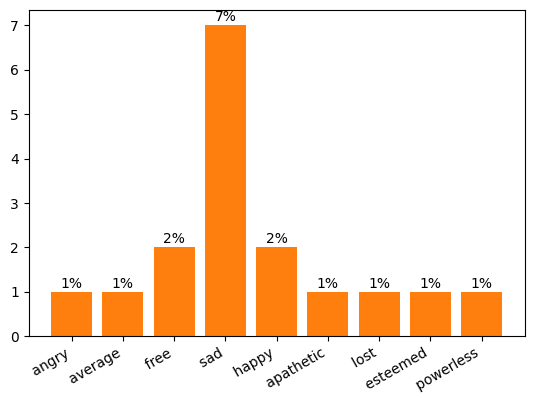

No charts were generated by quickchart


In [ ]:
import requests
from bs4 import BeautifulSoup
import lxml
from bs4 import BeautifulSoup
from collections import Counter
import pandas as pd
import re
import nltk
from IPython.display import display
import string
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('words')
nltk.download('vader_lexicon')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

print("\n\n1: Websites\n2: Text")
switch=int(input("\nEnter your Choice: "))

if switch ==1:#(Dropdown)
  links=[]
  num_web = (input("Enter URL of websites seprated by comma: "))#input take websites
  links = num_web.split(",")
  # links = ['https://www.grammarly.com/','https://www.yourdictionary.com/', 'https://www.merriam-webster.com/', 'https://www.cambridge.org/', 'https://www.dictionary.com/', 'https://prowritingaid.com/' ,'https://www.gingersoftware.com/', 'https://sentencecheckup.com/']
  e = []
  for i in links:
      source = requests.get(i).text
      soup = BeautifulSoup(source, 'lxml')
      a = soup.body.text
      a = a.lower()
      b = a.split()
      e+=b
  c = []
  d = []
  for i in e:
      if i not in d:
          c.append([i,e.count(i)])
          d.append(i)

  stopwords = nltk.corpus.stopwords.words('english')
  lst=[]
  for i in d:
    a=i.lower()
    lst.append(a)
  text = " ".join([word for word in lst if word not in string.punctuation])
  tokens = re.split('\W+', text)
  text_a = [word for word in tokens if word not in stopwords]
  texta = [wn.lemmatize(word) for word in text_a]
  final=list(texta)

  remove = str.maketrans('', '', string.punctuation)
  out_list = [s.translate(remove) for s in final]
  final1 = [x for x in out_list if not any(x1.isdigit() for x1 in x)]
  # print(len(final1))
  final2 = [x for x in final1 if len(x)>2]
  # print(len(final2))

  words = set(nltk.corpus.words.words())
  sent = ' '.join(final2)
  b = " ".join(w for w in nltk.wordpunct_tokenize(sent) \
          if w.lower() in words or not w.isalpha())
  h = b.split()
  print(list(h))
  print(len(h))
  emote_list = []
  with open('/content/drive/MyDrive/SentimentalAnalysis/emot.txt','r') as files:
    for line in files:
      final_line = line.replace("\n",'').replace(",",'').replace("'",'').strip()
      word,emotions = final_line.split(':')
      if word in h:
        emote_list.append(emotions)

  # print(emote_list)
  w = Counter(emote_list)
  # print(w)

  negl=[]
  posl=[]
  neul=[]
  for i in h:

    score = SentimentIntensityAnalyzer().polarity_scores(i)
    neg = score['neg']
    pos = score['pos']
    neu = score['neu']
    if neg>pos:
      negl.append(i)
    elif pos>neg:
      posl.append(i)
    else:
      neul.append(i)

  a_dictionary = {"Positive": 0, "Negative": 0}
  #a_dictionary["Neutral"] = len(neul)
  a_dictionary["Positive"] = len(posl)
  a_dictionary["Negative"] = len(negl)
  max_key = max(a_dictionary, key=a_dictionary.get)
  sum_ = len(posl)+len(negl)
  print("\n\n")
  print(f"{len(posl)*100/sum_} % Positive")
  print(f"{len(negl)*100/sum_} % Negative")
  print("Overall Vibe is "+str(max_key))#overall vibe


  # print(negl)
  # print(posl)
  # print(neul)

  a = {'Negative words': negl ,'Positive Words': posl , 'Neutral Words': neul }
  percentile_list = pd.DataFrame.from_dict(a, orient='index')
  percentile_list.T.to_csv('/content/drive/MyDrive/SentimentalAnalysis/Proto.csv',index = True)#saving CSV on local (custom)
  percentile_list = percentile_list.transpose()
  # print(percentile_list)
  print("\n\n")
  display(percentile_list)#displays the pos,neg, table


  fig,ax1 = plt.subplots()
  ax1.bar(w.keys(),w.values())
  fig.autofmt_xdate()
  # plt.savfig('graph.png')
  pps = ax1.bar(w.keys(), w.values(), align='center')
  for p in pps:
    height = p.get_height()
    ax1.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
        s="{}%".format(height),
        ha='center')
  print("\n\nEmotional Analysis")
  plt.show()#shows graph


elif switch==2:#(Dropdown)
  te=input("Enter Text:")#input take text
  d = list(te.split(" "))
  stopwords = nltk.corpus.stopwords.words('english')
  lst=[]
  for i in d:
    a=i.lower()
    lst.append(a)

  text = " ".join([word for word in lst if word not in string.punctuation])
  tokens = re.split('\W+', text)
  text_a = [word for word in tokens if word not in stopwords]
  texta = [wn.lemmatize(word) for word in text_a]
  final=list(texta)

  remove = str.maketrans('', '', string.punctuation)
  out_list = [s.translate(remove) for s in final]
  final1 = [x for x in out_list if not any(x1.isdigit() for x1 in x)]
  # print(len(final1))
  final2 = [x for x in final1 if len(x)>2]
  # print(len(final2))

  words = set(nltk.corpus.words.words())
  sent = ' '.join(final2)
  b = " ".join(w for w in nltk.wordpunct_tokenize(sent) \
          if w.lower() in words or not w.isalpha())
  h = b.split()
  print(list(h))
  print(len(h))
  emote_list = []
  with open('/content/drive/MyDrive/SentimentalAnalysis/emot.txt','r') as files:
    for line in files:
      final_line = line.replace("\n",'').replace(",",'').replace("'",'').strip()
      word,emotions = final_line.split(':')
      if word in h:
        emote_list.append(emotions)

  # print(emote_list)
  w = Counter(emote_list)
  # print(w)

  negl=[]
  posl=[]
  neul=[]
  for i in h:

    score = SentimentIntensityAnalyzer().polarity_scores(i)
    neg = score['neg']
    pos = score['pos']
    neu = score['neu']
    if neg>pos:
      negl.append(i)
    elif pos>neg:
      posl.append(i)
    else:
      neul.append(i)

  a_dictionary = {"Positive": 0, "Negative": 0}
  #a_dictionary["Neutral"] = len(neul)
  a_dictionary["Positive"] = len(posl)
  a_dictionary["Negative"] = len(negl)
  max_key = max(a_dictionary, key=a_dictionary.get)
  sum_ = len(posl)+len(negl)
  print("\n\n")
  print(f"{len(posl)*100/sum_} % Positive")
  print(f"{len(negl)*100/sum_} % Negative")
  print("Overall Vibe is "+str(max_key))#overall vibe
  # print(max_key)

  # print(negl)
  # print(posl)
  # print(neul)

  a = {'Negative words': negl ,'Positive Words': posl , 'Neutral Words': neul }
  percentile_list = pd.DataFrame.from_dict(a, orient='index')
  percentile_list.T.to_csv('/content/drive/MyDrive/SentimentalAnalysis/Proto.csv',index = True)#saving CSV on local (custom)
  percentile_list = percentile_list.transpose()
  # print(percentile_list)
  print("\n\n")
  display(percentile_list)#displays the pos,neg, table

  fig,ax1 = plt.subplots()
  ax1.bar(w.keys(),w.values())
  fig.autofmt_xdate()
  # plt.savfig('graph.png')
  pps = ax1.bar(w.keys(), w.values(), align='center',color=['cyan'])
  for p in pps:
    height = p.get_height()
    ax1.text(x=p.get_x() + p.get_width() / 2, y=height+.10,
        s="{}%".format(height),
        ha='center')
  print("\n\nEmotional Analysis")
  plt.show()#shows graph